# Linear Regression from scratch

what is Linear Regression?

Linear regression is a fundamental technique in machine learning and statistics used for predicting a continuous outcome variable (also called the dependent variable) based on one or more predictor variables (independent variables).  The goal is to find the linear relationship between the independent variables and the dependent variable. It is a Supervised Machine learning algorith(Regression)

The equation for a simple linear regression with one independent variable is:

y=mx+by=mx+b

Here:

    y is the dependent variable.
    x is the independent variable.
    m is the slope of the line.
    b is the y-intercept.

For multiple linear regression with more than one independent variable, the equation becomes:

y=b0+b1x1+b2x2+…+bnxny=b0​+b1​x1​+b2​x2​+…+bn​xn​

Here:

    y is the dependent variable.
    x2,…,xnx1​,x2​,…,xn​ are the independent variables.
    b0​ is the y-intercept.
    b1​,b2​,…,bn​ are the coefficients associated with each independent variable.

The goal of linear regression is to find the values of the coefficients (b0,b1,…,bnb0​,b1​,…,bn​) that minimize the difference between the predicted values and the actual values of the dependent variable. This is often done by minimizing the sum of squared differences, known as the least squares method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("canada_per_capita_income.csv")
data.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
X = list(data["year"])
y = list(data["income"])

Text(0, 0.5, 'income')

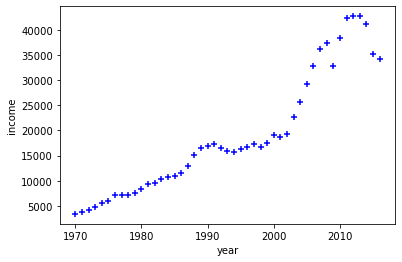

In [4]:
plt.scatter(X,y,marker ="+", color = 'b')
plt.xlabel('year')
plt.ylabel('income')

## Writing Linear Regression algorithm from scratch both with numpy and without numpy

### without numpy

In [5]:
class LinearRegress():
    def __init__(self):
        self.coef_ = [] #weights
        self.intercept_ = 0 #bias
        self.learning_rate = 0.5
        self.number_of_features = 0
        
    def m_init(self,number_of_features):
        m = []
        for _ in range(number_of_features):
            m.append(0)
        return m
    
    def scaling_xy(self,x,y):
        x_max = []
        x_scaled = []
        for i in x:
            xi_max = max(i)
            x_max.append(xi_max)
            xi = []
            for j in i:
                xi.append(j/xi_max)
            x_scaled.append(xi)
            
        y_scaled = []
        y_max = max(y)
        for i in y:
            y_scaled.append(i/y_max)

        return x_scaled,x_max,y_scaled,y_max
    
    def fit(self,x_train,y_train):
        self.number_of_features = len(x_train)
        self.coef_ = self.m_init(self.number_of_features) #weights
        n = len(x_train[0]) #number of data points
        self.intercept_ = 0 #bias
        
        x_train,x_train_max,y_train,y_train_max = self.scaling_xy(x_train,y_train)
        
        epoches = 500000
        
        for _ in range(epoches+1):
            try:
                #######################################################
                ##################### y_predicted #####################
                ###################### |mx +b| ########################
                y_pred = []
                for i in range(n):
                    y_p = self.intercept_
                    for j in range(self.number_of_features):
                        y_p += self.coef_[j] * x_train[j][i]
                    y_pred.append(y_p)
                #######################################################

                ############################################################
                ################ MSE(Mean Squared Error) ###################
                ########## |1/n*summation[(y - y_predicted)**2]| ###########
                se = [] #Squared errors
                sse = 0 #sum of squared errors

                for i in range(n):
                    a = (y_train[i] - y_pred[i])**2
                    
                    se.append(a)
                    sse += a

                MSE = 1/n * sse #Mean Squared Error
                ############################################################

                ############################################################
                ################## Gradient Decent #########################

                ############# Gradient #########################
                gm = [] #gradient for m(weights)
                gb = 0 #gradient for b(bias)

                m_se = 0 #sum of errors for m(weights)
                b_se = 0 #sum of errors for b(bias)


                for i in range(self.number_of_features):
                    for j in range(n):
                        ma = (y_train[j] - y_pred[j]) * x_train[i][j]
                        m_se += ma

                        ba = (y_train[j] - y_pred[j])
                        b_se += ba

                    mg = -2/n * m_se
                    gm.append(mg)
                    m_se = 0

                    bg = -2/n * b_se
                    gb = bg
                    b_se = 0

                    self.coef_[i] -= self.learning_rate * mg
                self.intercept_ -= self.learning_rate * gb
                
                mc = []
                
                #Normalizing the coef and intercept
                for i in range(len(self.coef_)):
                    mc.append(self.coef_[i] * y_train_max/x_train_max[i])
                bi = self.intercept_ * y_train_max
                
                if _%1000 == 0:
                    print(f"epoch: {_+1}, weight: {mc}, bias: {bi}, MSE: {MSE}, leaning rate: {self.learning_rate}")

            except:
                self.learning_rate *= 0.1
                self.coef_ = self.m_init(self.number_of_features) #weights
                self.intercept_ = 0 #bias

        #Normalizing the coef and intercept overall
        for i in range(len(self.coef_)):
            self.coef_[i] = self.coef_[i] * y_train_max/x_train_max[i]
        self.intercept_ = self.intercept_ * y_train_max
                
    def predict(self,x):
        n = len(x[0])
        y_pred = []
        
        for i in range(n):
            y_p = self.intercept_
            for j in range(self.number_of_features):
                y_p += self.coef_[j] * x[j][i]
            y_pred.append(y_p)
        
        return y_pred
    
    def score(self,x,y):
        y_pred = self.predict(x)
        y_true = y
        
        u = []
        for i,j in zip(y_true,y_pred):
            u.append((i-j)**2)
        u = sum(u)
        
        v = []
        for i in y_true:
            v.append((i- sum(y_true)/len(y_true))**2)
        v = sum(v)
        
        R = (1 - (u/v))
        return R

In [6]:
model1 = LinearRegress()

In [7]:
model1.fit([X],y)

epoch: 1, weight: [9.31542470287444], bias: 18920.137063404254, MSE: 0.274380254700803, leaning rate: 0.5
epoch: 1001, weight: [23.366683145139756], bias: -27612.923834676145, MSE: 0.07397831711637763, leaning rate: 0.5
epoch: 2001, weight: [41.590867079012725], bias: -63934.55403100486, MSE: 0.07104709075126867, leaning rate: 0.5
epoch: 3001, weight: [59.402528912564485], bias: -99434.00885495338, MSE: 0.06824706477389281, leaning rate: 0.5
epoch: 4001, weight: [76.81100648363906], bias: -134129.89904550108, MSE: 0.06557236671327811, leaning rate: 0.5
epoch: 5001, weight: [93.82542625954903], bias: -168040.41406846518, MSE: 0.06301738694764018, leaning rate: 0.5
epoch: 6001, weight: [110.45470812115681], bias: -201183.33165344025, MSE: 0.06057676693936943, leaning rate: 0.5
epoch: 7001, weight: [126.70757003915973], bias: -233576.02711384837, MSE: 0.058245387996615015, leaning rate: 0.5
epoch: 8001, weight: [142.5925326445216], bias: -265235.4824560178, MSE: 0.056018360537895835, lean

epoch: 71001, weight: [666.3611473656574], bias: -1309130.2324377706, MSE: 0.011144963065382624, leaning rate: 0.5
epoch: 72001, weight: [670.0305271915522], bias: -1316443.4738735529, MSE: 0.01102612966732353, leaning rate: 0.5
epoch: 73001, weight: [673.6168470417603], bias: -1323591.1729875605, MSE: 0.010912615199281824, leaning rate: 0.5
epoch: 74001, weight: [677.1219870594894], bias: -1330577.0769910037, MSE: 0.010804181588316758, leaning rate: 0.5
epoch: 75001, weight: [680.5477848290814], bias: -1337404.8482733285, MSE: 0.01070060141752648, leaning rate: 0.5
epoch: 76001, weight: [683.8960363393724], bias: -1344078.066322243, MSE: 0.010601657449088595, leaning rate: 0.5
epoch: 77001, weight: [687.1684969252469], bias: -1350600.2296002684, MSE: 0.010507142168648717, leaning rate: 0.5
epoch: 78001, weight: [690.366882187879], bias: -1356974.757378834, MSE: 0.01041685735010295, leaning rate: 0.5
epoch: 79001, weight: [693.4928688941451], bias: -1363204.9915308382, MSE: 0.010330613

epoch: 144001, weight: [797.9926394475328], bias: -1571477.8028237778, MSE: 0.008583851687699918, leaning rate: 0.5
epoch: 145001, weight: [798.6824126230337], bias: -1572852.5522385878, MSE: 0.008579652495234546, leaning rate: 0.5
epoch: 146001, weight: [799.356572112871], bias: -1574196.1828653796, MSE: 0.008575641256755404, leaning rate: 0.5
epoch: 147001, weight: [800.0154713479782], bias: -1575509.3991081307, MSE: 0.00857180955952556, leaning rate: 0.5
epoch: 148001, weight: [800.6594557590433], bias: -1576792.8894259671, MSE: 0.008568149367358672, leaning rate: 0.5
epoch: 149001, weight: [801.288862957594], bias: -1578047.3266940678, MSE: 0.008564653003764338, leaning rate: 0.5
epoch: 150001, weight: [801.9040229129895], bias: -1579273.368556423, MSE: 0.008561313135848783, leaning rate: 0.5
epoch: 151001, weight: [802.505258125411], bias: -1580471.6577706144, MSE: 0.008558122758934854, leaning rate: 0.5
epoch: 152001, weight: [803.0928837949431], bias: -1581642.8225447857, MSE: 0

epoch: 215001, weight: [822.4684335240329], bias: -1620259.177308571, MSE: 0.008493668154159568, leaning rate: 0.5
epoch: 216001, weight: [822.6041733322106], bias: -1620529.7129404086, MSE: 0.008493505536524459, leaning rate: 0.5
epoch: 217001, weight: [822.7368405380124], bias: -1620794.1247355004, MSE: 0.008493350197582518, leaning rate: 0.5
epoch: 218001, weight: [822.8665046927794], bias: -1621052.5513128429, MSE: 0.008493201811542544, leaning rate: 0.5
epoch: 219001, weight: [822.9932337734848], bias: -1621305.1281536464, MSE: 0.008493060067195591, leaning rate: 0.5
epoch: 220001, weight: [823.1170942183832], bias: -1621551.9876723844, MSE: 0.008492924667262607, leaning rate: 0.5
epoch: 221001, weight: [823.2381509618299], bias: -1621793.2592861883, MSE: 0.008492795327770265, leaning rate: 0.5
epoch: 222001, weight: [823.3564674683319], bias: -1622029.069482718, MSE: 0.008492671777456143, leaning rate: 0.5
epoch: 223001, weight: [823.4721057658107], bias: -1622259.5418864524, MSE

epoch: 287001, weight: [827.3117139053323], bias: -1629912.0561192264, MSE: 0.008490169415401984, leaning rate: 0.5
epoch: 288001, weight: [827.3378213587757], bias: -1629964.0894652857, MSE: 0.00849016339975689, leaning rate: 0.5
epoch: 289001, weight: [827.3633378446588], bias: -1630014.94498603, MSE: 0.008490157653369483, leaning rate: 0.5
epoch: 290001, weight: [827.3882767401068], bias: -1630064.6493426813, MSE: 0.00849015216418774, leaning rate: 0.5
epoch: 291001, weight: [827.4126511194376], bias: -1630113.22859295, MSE: 0.008490146920699328, leaning rate: 0.5
epoch: 292001, weight: [827.4364737610211], bias: -1630160.708204711, MSE: 0.008490141911907216, leaning rate: 0.5
epoch: 293001, weight: [827.4597571539784], bias: -1630207.1130693522, MSE: 0.008490137127306372, leaning rate: 0.5
epoch: 294001, weight: [827.4825135047256], bias: -1630252.4675148204, MSE: 0.008490132556862127, leaning rate: 0.5
epoch: 295001, weight: [827.5047547433775], bias: -1630296.7953183749, MSE: 0.0

epoch: 359001, weight: [828.2432440052654], bias: -1631768.638116389, MSE: 0.008490039988046268, leaning rate: 0.5
epoch: 360001, weight: [828.2482653702907], bias: -1631778.6459260227, MSE: 0.008490039765512134, leaning rate: 0.5
epoch: 361001, weight: [828.2531730718448], bias: -1631788.4271991684, MSE: 0.008490039552938438, leaning rate: 0.5
epoch: 362001, weight: [828.2579696828067], bias: -1631797.9870636973, MSE: 0.008490039349879318, leaning rate: 0.5
epoch: 363001, weight: [828.262657717822], bias: -1631807.330531408, MSE: 0.008490039155909327, leaning rate: 0.5
epoch: 364001, weight: [828.267239634611], bias: -1631816.4625006537, MSE: 0.00849003897062124, leaning rate: 0.5
epoch: 365001, weight: [828.2717178352646], bias: -1631825.3877589072, MSE: 0.008490038793626508, leaning rate: 0.5
epoch: 366001, weight: [828.276094667496], bias: -1631834.1109852705, MSE: 0.008490038624554037, leaning rate: 0.5
epoch: 367001, weight: [828.2803724258824], bias: -1631842.6367529396, MSE: 0.

epoch: 431001, weight: [828.4224094177146], bias: -1632125.7229591561, MSE: 0.008490035200195178, leaning rate: 0.5
epoch: 432001, weight: [828.4233751996428], bias: -1632127.64780661, MSE: 0.008490035191963062, leaning rate: 0.5
epoch: 433001, weight: [828.4243191201595], bias: -1632129.529083274, MSE: 0.008490035184099399, leaning rate: 0.5
epoch: 434001, weight: [828.4252416741182], bias: -1632131.367775413, MSE: 0.008490035176587593, leaning rate: 0.5
epoch: 435001, weight: [828.4261433451721], bias: -1632133.1648469667, MSE: 0.008490035169412297, leaning rate: 0.5
epoch: 436001, weight: [828.4270246060264], bias: -1632134.9212400638, MSE: 0.008490035162557868, leaning rate: 0.5
epoch: 437001, weight: [828.4278859186857], bias: -1632136.6378754973, MSE: 0.008490035156010498, leaning rate: 0.5
epoch: 438001, weight: [828.4287277346958], bias: -1632138.3156532212, MSE: 0.008490035149756001, leaning rate: 0.5
epoch: 439001, weight: [828.4295504953816], bias: -1632139.9554528107, MSE: 

In [8]:
slope0 = model1.predict([X])

#### ploting the slope

Text(0, 0.5, 'income')

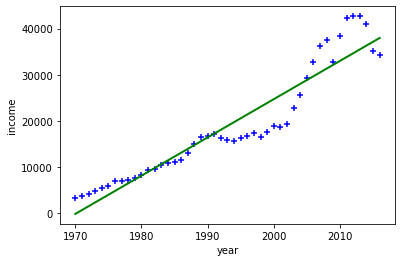

In [9]:
plt.scatter(X,y,marker ="+", color = 'b')
plt.plot(X,slope0,color = 'g',linewidth=2)
plt.xlabel('year')
plt.ylabel('income')

In [10]:
accuracy = model1.score([X],y)
accuracy

0.8909169178567484

### Using numpy

In [11]:
import numpy as np

In [12]:
class LinearReg():
    def __init__(self):
        self.coef_ = []
        self.intercept_ = 0
    
    def fit(self,X_train,y_train):
        x = np.array(X_train)
        y = np.array(y_train)
        
        n = x.shape[0]
        
        if len(x.shape) < 2:
            m = np.zeros(1)
            x = x.reshape(-1,1)
            x_max = x.max()
            
        else:
            m = np.zeros(x.shape[1])
            x_max = x.max(axis =0)
        
        y_max = y.max()
        x = x/x_max
        y = y/y_max
        
        b = 0
        learning_rate = 0.5
        
        epoches = 500000
        
        for _ in range(epoches):
            try:
                y_pred = np.dot(m,x.T) +b

                MSE = np.mean(np.square(y-y_pred))

                gradient_m = -2/n * np.dot(y-y_pred,x)
                gradient_b = -2 * np.mean(y-y_pred)

                m = m - (learning_rate * gradient_m)
                b = b - (learning_rate * gradient_b)
                self.coef_ = m
                self.intercept_ = b

                self.coef_ = self.coef_ * y_max/x_max
                self.intercept_ = self.intercept_ *  y_max

                if _%1000 == 0:
                    print(f"epoch: {_+1}, weight: {self.coef_}, bias: {self.intercept_}, MSE: {MSE}, leaning rate: {learning_rate}")
                    
            except:
                learning_rate *= 0.1
                m = np.zeros(x.shape[1]) #weights
                b = 0 #bias
    
    def predict(self,x):
        y = np.dot(self.coef_,x.T) + self.intercept_
        return y
    
    def score(self,x,y):
        y_pred = self.predict(x)
        y_true = np.array(y)
        
        u = ((y_true - y_pred)** 2).sum() #residual sum of squares
        v = ((y_true - y_true.mean()) ** 2).sum() #total sum of squares
        
        R = (1 - u/v)
        return R

In [13]:
model = LinearReg()

In [14]:
model.fit(data['year'],data['income'])

epoch: 1, weight: [9.3154247], bias: 18920.137063404254, MSE: 0.27438025470080313, leaning rate: 0.5
epoch: 1001, weight: [23.36668315], bias: -27612.923834676156, MSE: 0.07397831711637765, leaning rate: 0.5
epoch: 2001, weight: [41.59086708], bias: -63934.554031004816, MSE: 0.07104709075126868, leaning rate: 0.5
epoch: 3001, weight: [59.40252891], bias: -99434.00885495362, MSE: 0.06824706477389281, leaning rate: 0.5
epoch: 4001, weight: [76.81100648], bias: -134129.89904550157, MSE: 0.06557236671327811, leaning rate: 0.5
epoch: 5001, weight: [93.82542626], bias: -168040.41406846567, MSE: 0.06301738694764016, leaning rate: 0.5
epoch: 6001, weight: [110.45470812], bias: -201183.33165344104, MSE: 0.06057676693936933, leaning rate: 0.5
epoch: 7001, weight: [126.70757004], bias: -233576.02711384872, MSE: 0.058245387996615, leaning rate: 0.5
epoch: 8001, weight: [142.59253264], bias: -265235.4824560182, MSE: 0.05601836053789581, leaning rate: 0.5
epoch: 9001, weight: [158.1179237], bias: -2

epoch: 76001, weight: [683.89603634], bias: -1344078.066322243, MSE: 0.010601657449088595, leaning rate: 0.5
epoch: 77001, weight: [687.16849693], bias: -1350600.2296002684, MSE: 0.010507142168648717, leaning rate: 0.5
epoch: 78001, weight: [690.36688219], bias: -1356974.757378834, MSE: 0.01041685735010295, leaning rate: 0.5
epoch: 79001, weight: [693.49286889], bias: -1363204.9915308382, MSE: 0.010330613639859163, leaning rate: 0.5
epoch: 80001, weight: [696.54809586], bias: -1369294.1982826437, MSE: 0.010248230159708518, leaning rate: 0.5
epoch: 81001, weight: [699.53416479], bias: -1375245.5699264023, MSE: 0.010169534127469433, leaning rate: 0.5
epoch: 82001, weight: [702.45264115], bias: -1381062.2264936392, MSE: 0.010094360494614261, leaning rate: 0.5
epoch: 83001, weight: [705.30505497], bias: -1386747.2173909273, MSE: 0.01002255160011421, leaning rate: 0.5
epoch: 84001, weight: [708.09290162], bias: -1392303.5229985723, MSE: 0.009953956839777636, leaning rate: 0.5
epoch: 85001, 

epoch: 151001, weight: [802.50525813], bias: -1580471.6577706144, MSE: 0.008558122758934856, leaning rate: 0.5
epoch: 152001, weight: [803.09288379], bias: -1581642.8225447857, MSE: 0.00855507518187191, leaning rate: 0.5
epoch: 153001, weight: [803.66720799], bias: -1582787.4768669773, MSE: 0.008552164013002139, leaning rate: 0.5
epoch: 154001, weight: [804.22853179], bias: -1583906.2208270137, MSE: 0.008549383146755565, leaning rate: 0.5
epoch: 155001, weight: [804.77714949], bias: -1584999.6409311064, MSE: 0.008546726750844667, leaning rate: 0.5
epoch: 156001, weight: [805.31334869], bias: -1586068.310409322, MSE: 0.008544189254032736, leaning rate: 0.5
epoch: 157001, weight: [805.8374105], bias: -1587112.7895161146, MSE: 0.008541765334448935, leaning rate: 0.5
epoch: 158001, weight: [806.34960967], bias: -1588133.625824034, MSE: 0.008539449908427078, leaning rate: 0.5
epoch: 159001, weight: [806.85021471], bias: -1589131.3545107918, MSE: 0.008537238119843568, leaning rate: 0.5
epoch

epoch: 226001, weight: [823.80355081], bias: -1622920.1269889595, MSE: 0.008492230456440607, leaning rate: 0.5
epoch: 227001, weight: [823.90906894], bias: -1623130.4294407372, MSE: 0.008492132189515987, leaning rate: 0.5
epoch: 228001, weight: [824.01219857], bias: -1623335.9714922972, MSE: 0.008492038320974879, leaning rate: 0.5
epoch: 229001, weight: [824.11299376], bias: -1623536.8608999169, MSE: 0.008491948653948006, leaning rate: 0.5
epoch: 230001, weight: [824.21150735], bias: -1623733.202980706, MSE: 0.00849186300037748, leaning rate: 0.5
epoch: 231001, weight: [824.30779099], bias: -1623925.1006678354, MSE: 0.008491781180622571, leaning rate: 0.5
epoch: 232001, weight: [824.40189515], bias: -1624112.6545644673, MSE: 0.008491703023083406, leaning rate: 0.5
epoch: 233001, weight: [824.49386918], bias: -1624295.9629965117, MSE: 0.008491628363840984, leaning rate: 0.5
epoch: 234001, weight: [824.58376129], bias: -1624475.1220641893, MSE: 0.008491557046313072, leaning rate: 0.5
epo

epoch: 302001, weight: [827.64696721], bias: -1630580.2312457464, MSE: 0.008490102638115386, leaning rate: 0.5
epoch: 303001, weight: [827.66548588], bias: -1630617.139798957, MSE: 0.008490099611392033, leaning rate: 0.5
epoch: 304001, weight: [827.68358536], bias: -1630653.2128912243, MSE: 0.00849009672014339, leaning rate: 0.5
epoch: 305001, weight: [827.70127514], bias: -1630688.4694340164, MSE: 0.008490093958305701, leaning rate: 0.5
epoch: 306001, weight: [827.7185645], bias: -1630722.9279107247, MSE: 0.00849009132008677, leaning rate: 0.5
epoch: 307001, weight: [827.73546249], bias: -1630756.606386352, MSE: 0.008490088799953268, leaning rate: 0.5
epoch: 308001, weight: [827.75197798], bias: -1630789.5225169756, MSE: 0.008490086392619792, leaning rate: 0.5
epoch: 309001, weight: [827.76811963], bias: -1630821.6935590203, MSE: 0.008490084093037557, leaning rate: 0.5
epoch: 310001, weight: [827.7838959], bias: -1630853.1363782855, MSE: 0.008490081896383592, leaning rate: 0.5
epoch: 

epoch: 377001, weight: [828.31817009], bias: -1631917.969213456, MSE: 0.008490037196693962, leaning rate: 0.5
epoch: 378001, weight: [828.32149543], bias: -1631924.5967686921, MSE: 0.00849003709909952, leaning rate: 0.5
epoch: 379001, weight: [828.32474549], bias: -1631931.074302779, MSE: 0.0084900370058733, leaning rate: 0.5
epoch: 380001, weight: [828.32792199], bias: -1631937.405211592, MSE: 0.008490036916819805, leaning rate: 0.5
epoch: 381001, weight: [828.33102659], bias: -1631943.5928141384, MSE: 0.00849003683175232, leaning rate: 0.5
epoch: 382001, weight: [828.33406091], bias: -1631949.6403542915, MSE: 0.008490036750492367, leaning rate: 0.5
epoch: 383001, weight: [828.33702655], bias: -1631955.5510025022, MSE: 0.008490036672869716, leaning rate: 0.5
epoch: 384001, weight: [828.33992505], bias: -1631961.3278574462, MSE: 0.008490036598721383, leaning rate: 0.5
epoch: 385001, weight: [828.34275795], bias: -1631966.9739476687, MSE: 0.008490036527891853, leaning rate: 0.5
epoch: 3

epoch: 452001, weight: [828.43869592], bias: -1632158.1827006277, MSE: 0.008490035086582576, leaning rate: 0.5
epoch: 453001, weight: [828.43929304], bias: -1632159.3727903108, MSE: 0.00849003508343573, leaning rate: 0.5
epoch: 454001, weight: [828.43987665], bias: -1632160.5359411635, MSE: 0.008490035080429722, leaning rate: 0.5
epoch: 455001, weight: [828.44044704], bias: -1632161.6727629607, MSE: 0.008490035077558234, leaning rate: 0.5
epoch: 456001, weight: [828.44100452], bias: -1632162.7838516922, MSE: 0.008490035074815199, leaning rate: 0.5
epoch: 457001, weight: [828.44154939], bias: -1632163.8697898528, MSE: 0.0084900350721952, leaning rate: 0.5
epoch: 458001, weight: [828.44208192], bias: -1632164.9311467458, MSE: 0.008490035069692224, leaning rate: 0.5
epoch: 459001, weight: [828.44260239], bias: -1632165.9684787972, MSE: 0.008490035067301397, leaning rate: 0.5
epoch: 460001, weight: [828.44311109], bias: -1632166.9823298326, MSE: 0.0084900350650176, leaning rate: 0.5
epoch:

In [15]:
slope = model.predict(np.array(X).reshape((-1, 1)))

#### ploting the slope

Text(0, 0.5, 'income')

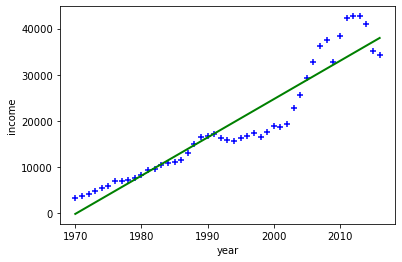

In [16]:
plt.scatter(X,y,marker ="+", color = 'b')
plt.plot(X,slope,color = 'g',linewidth=2)
plt.xlabel('year')
plt.ylabel('income')

In [17]:
accuracy = model.score(np.array(data['year']).reshape(-1,1),data['income'])
accuracy

0.8909169178567441

## Comparing the algorithm i wrote with that of scikit learn(sklearn)

### using sklearn

In [18]:
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
md = LinearRegression()

In [20]:
md.fit(np.array(data['year']).reshape(-1,1),data['income'])

LinearRegression()

In [21]:
slope2 = md.predict(np.array(X).reshape((-1, 1)))

#### ploting the slope

Text(0, 0.5, 'income')

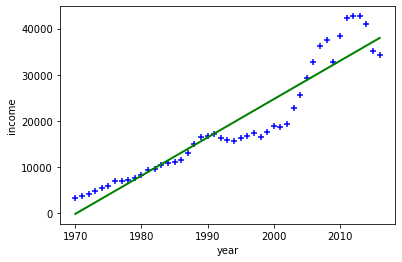

In [22]:
plt.scatter(X,y,marker ="+", color = 'b')
plt.plot(X,slope2,color = 'g',linewidth=2)
plt.xlabel('year')
plt.ylabel('income')

In [23]:
accuracy = md.score(np.array(data['year']).reshape(-1,1),data['income'])
accuracy

0.890916917957032

If you noticed the algorithm i wrote and that of sklearn perform almost the same, if not the same(check the accuracies and the plots). The only issue is that mine is slow, especially the one without numpy.

### So far I've used data with only one independent variable, now i'm going to test how my code works with multiply independent variable

In [24]:
data2 = pd.read_csv('Real estate.csv')
data2.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


###### checking the size of the data

In [25]:
len(data2)

414

###### Droping the features that are not important

In [26]:
data2.drop(["No","X1 transaction date","X5 latitude","X6 longitude"], axis = 1, inplace= True)

In [27]:
data2

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
...,...,...,...,...
409,13.7,4082.01500,0,15.4
410,5.6,90.45606,9,50.0
411,18.8,390.96960,7,40.6
412,8.1,104.81010,5,52.5


###### Droping all the NaN values, if any

In [28]:
data2.dropna(inplace= True)

###### checking to see if each colum are of the right datatype

In [29]:
data2["X2 house age"].dtype

dtype('float64')

In [30]:
data2["X3 distance to the nearest MRT station"].dtype

dtype('float64')

In [31]:
data2["X4 number of convenience stores"].dtype

dtype('int64')

In [32]:
data2["Y house price of unit area"].dtype

dtype('float64')

### Training and predicting

##### without numpy (plain pyhthon)

In [33]:
model0 = model1 = LinearRegress()

In [34]:
X = list([data2["X2 house age"],data2["X3 distance to the nearest MRT station"],data2["X4 number of convenience stores"]])
y = list(data2["Y house price of unit area"])

In [35]:
model0.fit(X,y)

epoch: 1, weight: [0.33369036909719435, 0.0007038049283502836, 1.7832850241545894], bias: 37.98019323671498, MSE: 0.1178585348038219, leaning rate: 0.5
epoch: 1001, weight: [-0.25285582669745377, -0.005379129553516838, 1.2974425009394015], bias: 42.97728602678296, MSE: 0.006139299695620633, leaning rate: 0.5
epoch: 2001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 3001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 4001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 5001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 6001, weight: [-0.2528558265877558, -0.00537912

epoch: 52001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 53001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 54001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 55001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 56001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 57001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 58001, weight: [-0.25285582658775

epoch: 104001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 105001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 106001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 107001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 108001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 109001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 110001, weight: [-0.2528558

epoch: 155001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 156001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 157001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 158001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 159001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 160001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 161001, weight: [-0.2528558

epoch: 206001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 207001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 208001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 209001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 210001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 211001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 212001, weight: [-0.2528558

epoch: 257001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 258001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 259001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 260001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 261001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 262001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 263001, weight: [-0.2528558

epoch: 308001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 309001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 310001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 311001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 312001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 313001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 314001, weight: [-0.2528558

epoch: 359001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 360001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 361001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 362001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 363001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 364001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 365001, weight: [-0.2528558

epoch: 410001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 411001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 412001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 413001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 414001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 415001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 416001, weight: [-0.2528558

epoch: 461001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 462001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 463001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 464001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 465001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 466001, weight: [-0.2528558265877558, -0.005379129623944063, 1.2974424761019436], bias: 42.977286206064015, MSE: 0.0061392996956206375, leaning rate: 0.5
epoch: 467001, weight: [-0.2528558

In [36]:
accuracy = model0.score(X,y)
accuracy 

0.5410632980005718

##### using numpy

In [37]:
model1 = LinearReg()

In [38]:
X1 = data2.drop('Y house price of unit area', axis = 1)
y1 = data2['Y house price of unit area']

In [39]:
model1.fit(X1,y1)

epoch: 1, weight: [3.33690369e-01 7.03804928e-04 1.78328502e+00], bias: 37.980193236714975, MSE: 0.11785853480382187, leaning rate: 0.5
epoch: 1001, weight: [-0.25285583 -0.00537913  1.2974425 ], bias: 42.97728602678296, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 2001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 3001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 4001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 5001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 6001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 7001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.9772862060

epoch: 64001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 65001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 66001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 67001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 68001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 69001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 70001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 71001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286

epoch: 128001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 129001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 130001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 131001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 132001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 133001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 134001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 135001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

epoch: 190001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 191001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 192001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 193001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 194001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 195001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 196001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 197001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

epoch: 253001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 254001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 255001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 256001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 257001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 258001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 259001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 260001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

epoch: 315001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 316001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 317001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 318001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 319001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 320001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 321001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 322001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

epoch: 378001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 379001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 380001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 381001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 382001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 383001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 384001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 385001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

epoch: 440001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 441001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 442001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 443001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 444001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 445001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 446001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 42.977286206064015, MSE: 0.006139299695620637, leaning rate: 0.5
epoch: 447001, weight: [-0.25285583 -0.00537913  1.29744248], bias: 4

In [40]:
accuracy = model1.score(X1,y1)
accuracy

0.5410632980005723

#### comparing with sklearn

In [41]:
md = LinearRegression()

In [42]:
X2 = data2.drop('Y house price of unit area', axis = 1)
y2 = data2['Y house price of unit area']

In [43]:
md.fit(X2,y2)

LinearRegression()

In [44]:
accuracy = md.score(X2,y2)
accuracy

0.5410632980005723

If you noticed the algorithm i wrote and that of sklearn perform almost the same, if not the same(check the accuracies). The only issue is that mine is slow, especially the one without numpy.

# Thank you
## Feel free to run the codes on your own and play with it.
### Watch out for more machine learning algorithms from scratch.

visit my website: [ALAINENGIYA](www.anonymousasquare.code.blog)

X: [anonymousAsquare(byteBard)](https://twitter.com/AlainengiyaG)

Instagram: [anonymousasquare](https://www.instagram.com/anonymousasquare/)

LinkedIn: [George (Junior) Alainengiya](linkedin.com/in/george-alainengiya-5b44b5251)

email1: [alainengiyaalainengiya@gmail.com](alainengiyaalainengiya@gmail.com)

email2: [anonymousAsquare@gmail.com](anonymousAsquare@gmail.com)

WhatsApp: [+2348073279585](https://wa.me/qr/NNSNXPBJIBV5H1)
